<a href="https://colab.research.google.com/github/miguelreal90/Segmentacion-de-Comerciantes/blob/main/notebooks/Comerciantes_Bancolombia_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Proyecto de Comerciantes de la entidad bancaria Bancolombia(Norte de Satander)
Explorando mi curiosidad y motivado por la vasta cantidad de datos abiertos disponibles en Colombia, me sumergí en la fascinante tarea de analizar una base de datos específica relacionada con empresas en el departamento de Norte de Santander(https://www.datos.gov.co/Comercio-Industria-y-Turismo/BASE-DE-DATOS-EMPRESAS-DE-NORTE-DE-SANTANDER/w98a-ssvz/about_data). Dada la amplitud de la información, tomé la decisión de focalizar mi atención en una entidad bancaria en particular: Bancolombia.

Este enfoque selectivo permitirá una exploración detallada y específica de los datos asociados con Bancolombia en la región, proporcionando una visión más precisa y detallada de la dinámica empresarial en el departamento. A través de esta investigación, busco desentrañar patrones, identificar tendencias y extraer conocimientos valiosos que puedan contribuir a una comprensión más profunda de la actividad económica en esta área geográfica.

Este proyecto no solo representa un viaje de descubrimiento en el vasto mundo de los datos abiertos, sino también una oportunidad para aplicar herramientas avanzadas de machine learning y analítica de datos con el objetivo de obtener insights significativos y beneficios tangibles en el contexto empresarial de Norte de Santander



In [1]:
import pandas as pd
df_bancolombia=pd.read_csv('datos_Bancolombia.csv')
df_bancolombia.head()

,Tipo_Entidad,Nombre_Tipo_Entidad,Codigo_Entidad,Nombre_Entidad,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,...,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,...,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544.0,11001.0
1,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,...,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622.0,5154.0
2,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,...,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613.0,17001.0
3,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,...,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90.0,5266.0
4,1,BC-ESTABLECIMIENTO BANCARIO,7.0,Bancolombia,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,...,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010.0,11001.0


Antes de fltrar los datos, se habian trabajado los valores nulos y duplicados, seguimos explorando los datos
Sabiendo que ya estamos en Bancolobia borramos las columnas que identifican a Bancolombia ['Tipo_Entidad','Nombre_Tipo_Entidad','Codigo_Entidad','Nombre_Entidad']

In [2]:
columnas_a_eliminar = ['Tipo_Entidad','Nombre_Tipo_Entidad','Codigo_Entidad','Nombre_Entidad']

# Utiliza el método drop para eliminar las columnas
df_bancolombia = df_bancolombia.drop(columnas_a_eliminar, axis=1)
df_bancolombia.head()


,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544.0,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622.0,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613.0,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90.0,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010.0,11001.0


In [3]:
df_bancolombia.isnull().sum()

Fecha_Corte                         1
Tipo_de_persona                     1
Sexo                                1
Tamaño_de_empresa                   1
Tipo_de_crédito                     1
Tipo_de_garantía                    1
Producto de crédito                 1
Plazo de crédito                    1
Tasa_efectiva_promedio_ponderada    1
margen_adicional                    1
Montos_desembolsados                1
Numero_de_creditos_desembolsados    1
Antiguedad_de_la_empresa            1
Tipo_de_Tasa                        1
Rango_monto_desembolsado            1
Clase_deudor                        1
Codigo_CIIU                         1
Codigo_Municipio                    1
dtype: int64

In [4]:
df_bancolombia=df_bancolombia.dropna()

In [5]:
# Convierte la columna de flotantes a enteros
df_bancolombia['Codigo_CIIU'] = df_bancolombia['Codigo_CIIU'].astype(int)
df_bancolombia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0


In [ ]:
df_bancolombia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29302 entries, 0 to 29301
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fecha_Corte                       29302 non-null  object 
 1   Tipo_de_persona                   29302 non-null  object 
 2   Sexo                              29302 non-null  object 
 3   Tamaño_de_empresa                 29302 non-null  object 
 4   Tipo_de_crédito                   29302 non-null  object 
 5   Tipo_de_garantía                  29302 non-null  object 
 6   Producto de crédito               29302 non-null  object 
 7   Plazo de crédito                  29302 non-null  object 
 8   Tasa_efectiva_promedio_ponderada  29302 non-null  float64
 9   margen_adicional                  29302 non-null  float64
 10  Montos_desembolsados              29302 non-null  float64
 11  Numero_de_creditos_desembolsados  29302 non-null  int64  
 12  Anti

In [ ]:
df_bancolombia.describe()

,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Codigo_CIIU,Codigo_Municipio
count,29302.000000,29302.000000,2.930200e+04,29302.000000,29302.000000,29302.000000
mean,23.555378,0.366051,1.762778e+07,25.341547,3902.982970,31668.174493
std,17.764558,2.224860,3.347008e+08,1094.512949,3119.890869,27701.338659
min,0.000000,0.000000,6.200000e-01,1.000000,10.000000,5001.000000
25%,0.000000,0.000000,2.261027e+05,1.000000,111.000000,8001.000000
50%,35.645000,0.000000,1.003577e+06,2.000000,4645.000000,18610.000000
75%,38.260000,0.000000,3.900000e+06,4.000000,6311.000000,63001.000000
max,56.810000,27.510000,4.166073e+10,122868.000000,9900.000000,99624.000000


## Analisis de Distribucion

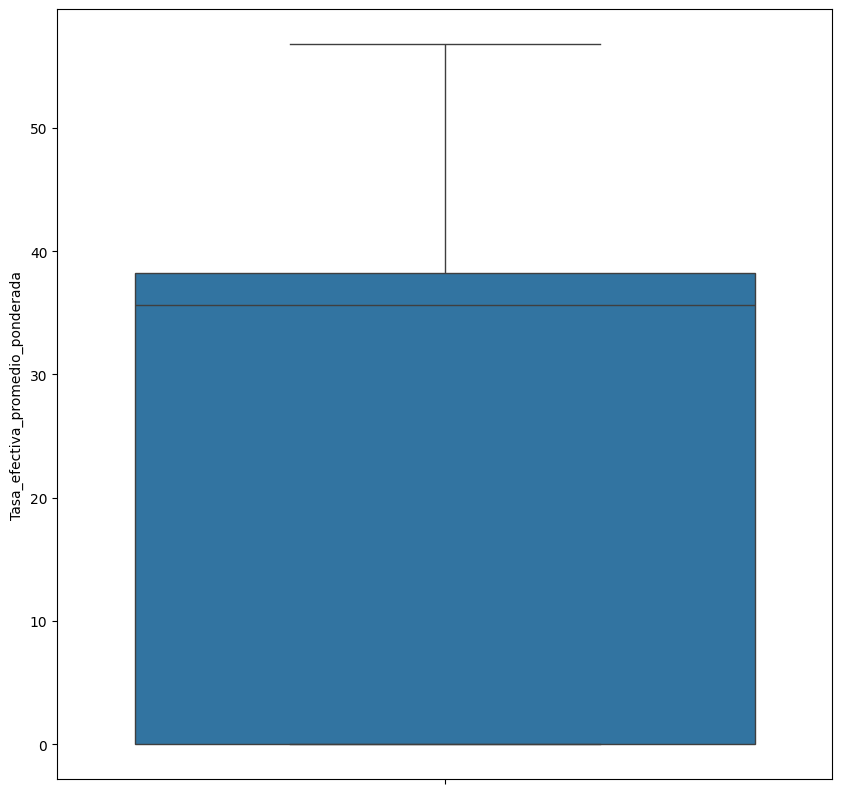

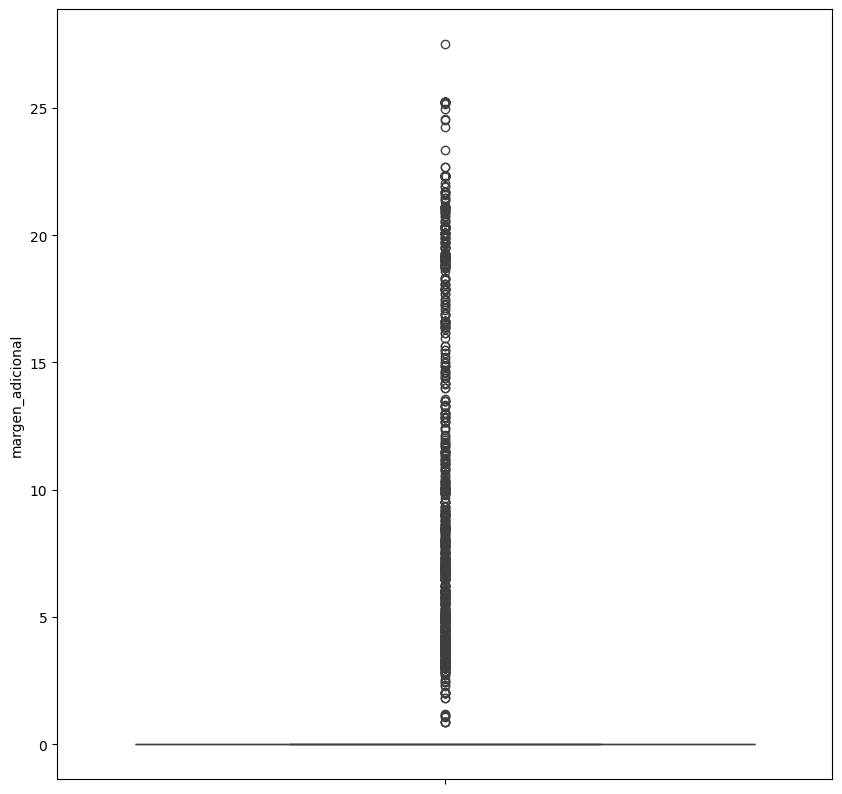

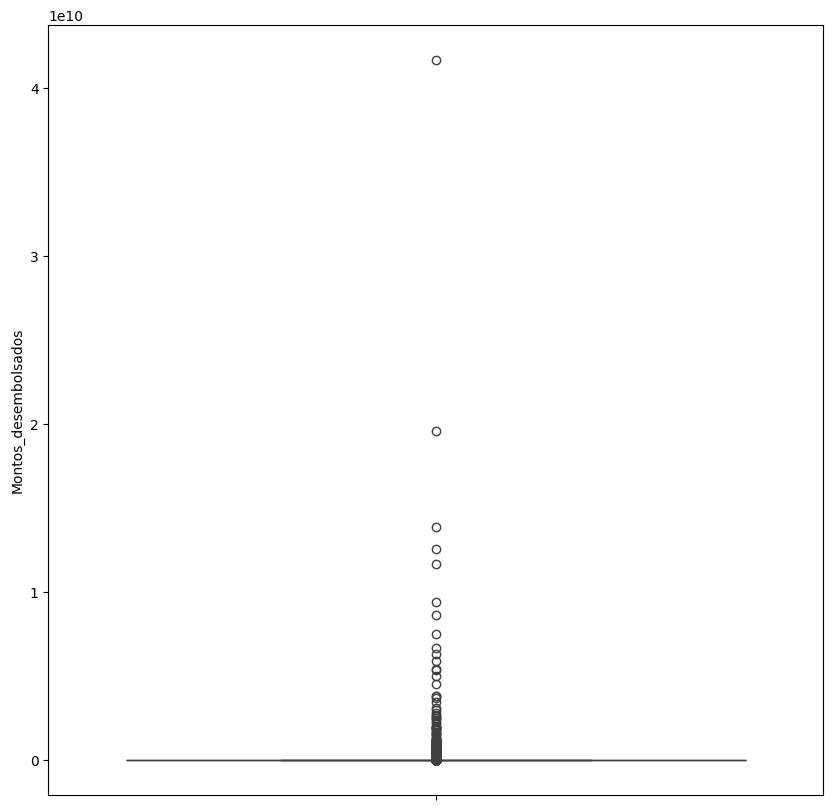

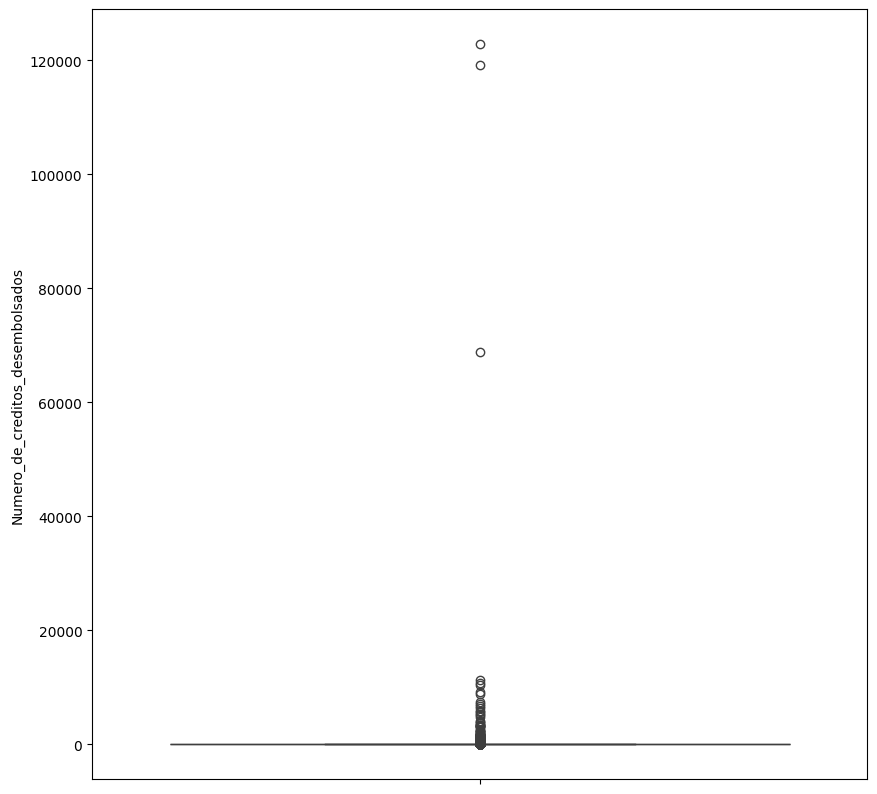

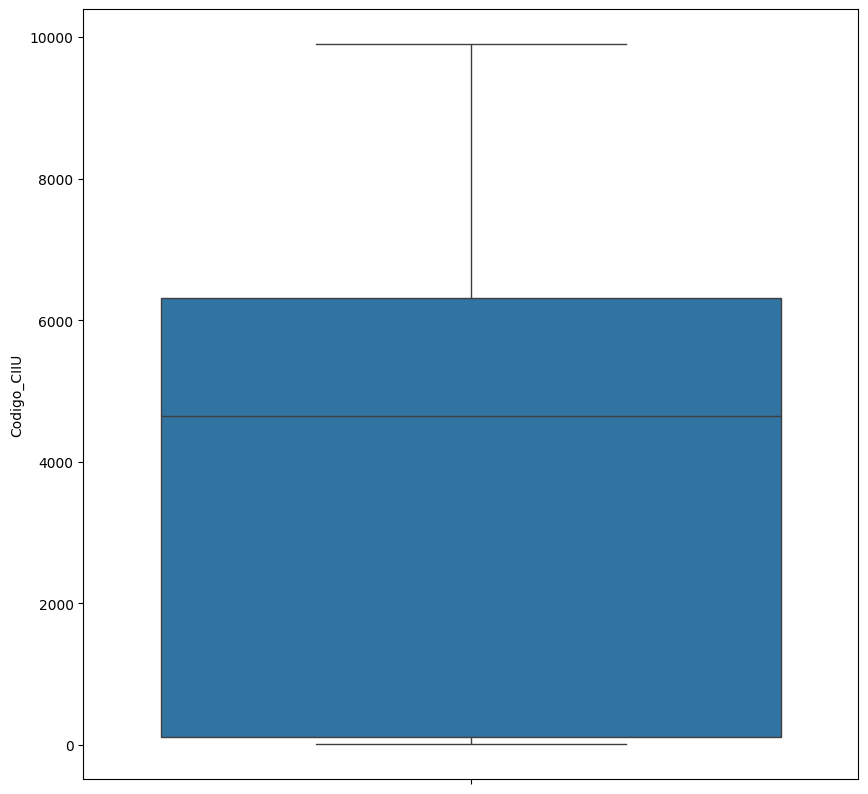

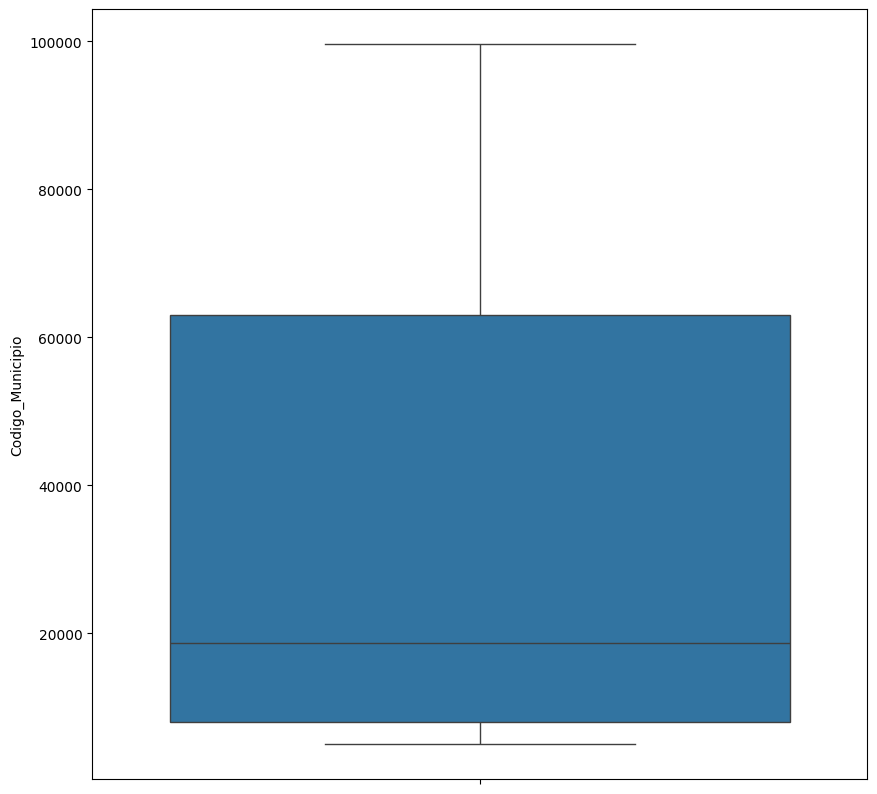

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
int_cols = df_bancolombia.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df_bancolombia, y= _)
    plt.show()


In [6]:
df_Bancolombia_copia = df_bancolombia.copy()
columnas_a_eliminar = ['margen_adicional','Montos_desembolsados','Numero_de_creditos_desembolsados']

# Utiliza el método drop para eliminar las columnas
df_Bancolombia_copia =df_Bancolombia_copia.drop(columnas_a_eliminar, axis=1)
df_Bancolombia_copia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0


## Exploramos los valores unicos de las variables tipo objeto

In [7]:
def mostrar_conteo_valores_objeto(dataframe):
    for columna in dataframe.select_dtypes(include='object').columns:
        conteo_valores = dataframe[columna].value_counts()
        print(f"Columna: {columna}")
        print(conteo_valores)
        print("------")
mostrar_conteo_valores_objeto(df_Bancolombia_copia)

Columna: Fecha_Corte
01/12/2023    8261
24/11/2023    8233
06/10/2023    8126
10/11/2023    7894
20/10/2023    7890
13/10/2023    7744
27/10/2023    7715
17/11/2023    7654
03/11/2023    7492
22/12/2023    3796
29/09/2023    3620
05/01/2024    1659
08/12/2023     257
15/12/2023     129
29/12/2023     125
Name: Fecha_Corte, dtype: int64
------
Columna: Tipo_de_persona
Natural     55985
Jurídica    24610
Name: Tipo_de_persona, dtype: int64
------
Columna: Sexo
Masculino    31104
Femenino     24881
No aplica    24610
Name: Sexo, dtype: int64
------
Columna: Tamaño_de_empresa
No aplica          55500
Pequeña empresa     9033
Microempresa        6718
Mediana empresa     5325
Gran empresa        4019
Name: Tamaño_de_empresa, dtype: int64
------
Columna: Tipo_de_crédito
Consumo                                 55307
Comercial ordinario                     24718
Crédito productivo                        199
Vivienda                                  193
Comercial preferencial o corporativo      

## convertimos algunas columnas a numericas

In [8]:
#convertir es Tipo_de_persona
#'Natural': 0, 'Jurídica': 1


# Crear un diccionario de mapeo
mapeo = {'Natural': 0, 'Jurídica': 1}

# Aplicar el mapeo a la columna Tipo_de_persona
df_Bancolombia_copia['Tipo_de_persona'] = df_Bancolombia_copia['Tipo_de_persona'].map(mapeo)
df_Bancolombia_copia['Tipo_de_persona'].value_counts()


0    55985
1    24610
Name: Tipo_de_persona, dtype: int64

In [9]:
#convertir columna Sexo
#'Masculino': 1, 'Femenino': 2, 'No aplica': 3, 'No binario': 4
# Crear un diccionario de mapeo
mapeo_sexo = {'Masculino': 1, 'Femenino': 2, 'No aplica': 3, 'No binario': 4}

# Aplicar el mapeo a la columna 'Sexo'
df_Bancolombia_copia['Sexo'] = df_Bancolombia_copia['Sexo'].map(mapeo_sexo)
df_Bancolombia_copia['Sexo'].value_counts()

1    31104
2    24881
3    24610
Name: Sexo, dtype: int64

In [10]:
#convertir columna Tamaño_de_empresa
# 'No aplica' : 1,'Pequeña empresa' : 2,'Microempresa' : 3,'Mediana empresa': 4,'Gran empresa' : 5
mapeo_Tamaño_de_empresa = {'No aplica' : 1,'Pequeña empresa' : 2,'Microempresa' : 3,'Mediana empresa': 4,'Gran empresa' : 5}

# Aplicar el mapeo a la columna 'Tamaño_de_empresa'
df_Bancolombia_copia['Tamaño_de_empresa'] = df_Bancolombia_copia['Tamaño_de_empresa'].map(mapeo_Tamaño_de_empresa)
df_Bancolombia_copia['Tamaño_de_empresa'].value_counts()

1    55500
2     9033
3     6718
4     5325
5     4019
Name: Tamaño_de_empresa, dtype: int64

In [11]:
#convertir columna Tipo_de_crédito
# 'Consumo' : 1,'Comercial ordinario' :2,'Vivienda' : 3,'Crédito productivo' : 4,'Comercial preferencial o corporativo' : 5,'Comercial especial' : 6,,'Comercial tesoreria':7
mapeo_Tipo_de_credito = {'Consumo' : 1,'Comercial ordinario' :2,'Vivienda' : 3,'Crédito productivo' : 4,
'Comercial preferencial o corporativo' : 5,'Comercial especial' : 6,'Comercial tesoreria':7}

# Aplicar el mapeo a la columna 'Tipo_de_crédito'
df_Bancolombia_copia['Tipo_de_crédito'] = df_Bancolombia_copia['Tipo_de_crédito'].map(mapeo_Tipo_de_credito)
df_Bancolombia_copia['Tipo_de_crédito'].value_counts()

1    55307
2    24718
4      199
3      193
5      101
6       60
7       17
Name: Tipo_de_crédito, dtype: int64

In [12]:
# convertir Columna Tipo_de_garantía
#'Garantia idónea o no idónea ' : 1,'Sin garantia' : 2,'Garantía  fondo nacional de garantías (FNG) o Fondo de Garantías de Antioquia (FGA)' : 3,'Garantía del fondo agropecuario de garantías (FAG)' : 4
mapeo_Tipo_de_garantía = {'Garantia idónea o no idónea' : 1 ,'Sin garantia' : 2 ,
'Garantía  fondo nacional de garantías (FNG) o Fondo de Garantías de Antioquia (FGA)' : 3 ,
'Garantía del fondo agropecuario de garantías (FAG)' : 4 }

# Aplicar el mapeo a la columna 'Tipo_de_garantía'
df_Bancolombia_copia['Tipo_de_garantía'] = df_Bancolombia_copia['Tipo_de_garantía'].map(mapeo_Tipo_de_garantía)
df_Bancolombia_copia['Tipo_de_garantía'].value_counts()

1    43297
2    37094
3      146
4       58
Name: Tipo_de_garantía, dtype: int64

In [13]:
#converit Columna Antiguedad_de_la_empresa
#'No aplica(1)' : 1,'más de 10 años' : 2,'más de 5 y hasta 10 años' : 3,'0 a 5 años' : 4
mapeo_Antiguedad_de_la_empresa = {'No aplica(1)' : 1,'más de 10 años' : 2,'más de 5 y hasta 10 años' : 3,'0 a 5 años' : 4}

# Aplicar el mapeo a la columna 'Antiguedad_de_la_empresa'
df_Bancolombia_copia['Antiguedad_de_la_empresa'] = df_Bancolombia_copia['Antiguedad_de_la_empresa'].map(mapeo_Antiguedad_de_la_empresa)
df_Bancolombia_copia['Antiguedad_de_la_empresa'].value_counts()

1    55500
2    16303
3     5699
4     3093
Name: Antiguedad_de_la_empresa, dtype: int64

In [14]:
# Convertir Columna Tipo_de_Tasa
#'FS' : 1,'DTF' : 2,'IB1' : 3,'IB6' : 4,'IB3' : 5,'IBE' : 6,'IPC' : 7,'IBR' : 8
mapeo_Tipo_de_Tasa = {'FS' : 1,'DTF' : 2,'IB1' : 3,'IB6' : 4,'IB3' : 5,'IBE' : 6,'IPC' : 7,'IBR' : 8}

# Aplicar el mapeo a la columna 'Tipo_de_Tasa'
df_Bancolombia_copia['Tipo_de_Tasa'] = df_Bancolombia_copia['Tipo_de_Tasa'].map(mapeo_Tipo_de_Tasa)
df_Bancolombia_copia['Tipo_de_Tasa'].value_counts()


1    77347
2     2948
3      211
4       55
5       33
6        1
Name: Tipo_de_Tasa, dtype: int64

In [15]:
#Convertimos Columna Clase_deudor
# 'Deudor de la entidad' : 1,'Deudor nuevo en la entidad' : 2
mapeo_Clase_deudor = {'Deudor de la entidad' : 1,'Deudor nuevo en la entidad' : 2}

# Aplicar el mapeo a la columna 'Clase_deudor'
df_Bancolombia_copia['Clase_deudor'] = df_Bancolombia_copia['Clase_deudor'].map(mapeo_Clase_deudor)
df_Bancolombia_copia['Clase_deudor'].value_counts()


1    76972
2     3623
Name: Clase_deudor, dtype: int64

In [16]:
df_Bancolombia_copia = df_Bancolombia_copia.drop('Fecha_Corte', axis=1)
df_Bancolombia_copia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80595 entries, 0 to 80594
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Tipo_de_persona                   80595 non-null  int64  
 1   Sexo                              80595 non-null  int64  
 2   Tamaño_de_empresa                 80595 non-null  int64  
 3   Tipo_de_crédito                   80595 non-null  int64  
 4   Tipo_de_garantía                  80595 non-null  int64  
 5   Producto de crédito               80595 non-null  object 
 6   Plazo de crédito                  80595 non-null  object 
 7   Tasa_efectiva_promedio_ponderada  80595 non-null  float64
 8   Antiguedad_de_la_empresa          80595 non-null  int64  
 9   Tipo_de_Tasa                      80595 non-null  int64  
 10  Rango_monto_desembolsado          80595 non-null  object 
 11  Clase_deudor                      80595 non-null  int64  
 12  Codi

In [ ]:
df_filtrado = df_Bancolombia_copia[df_Bancolombia_copia['Tasa_efectiva_promedio_ponderada'] == 0]
df_filtrado.shape

(677756, 14)

## Correlacion de variables

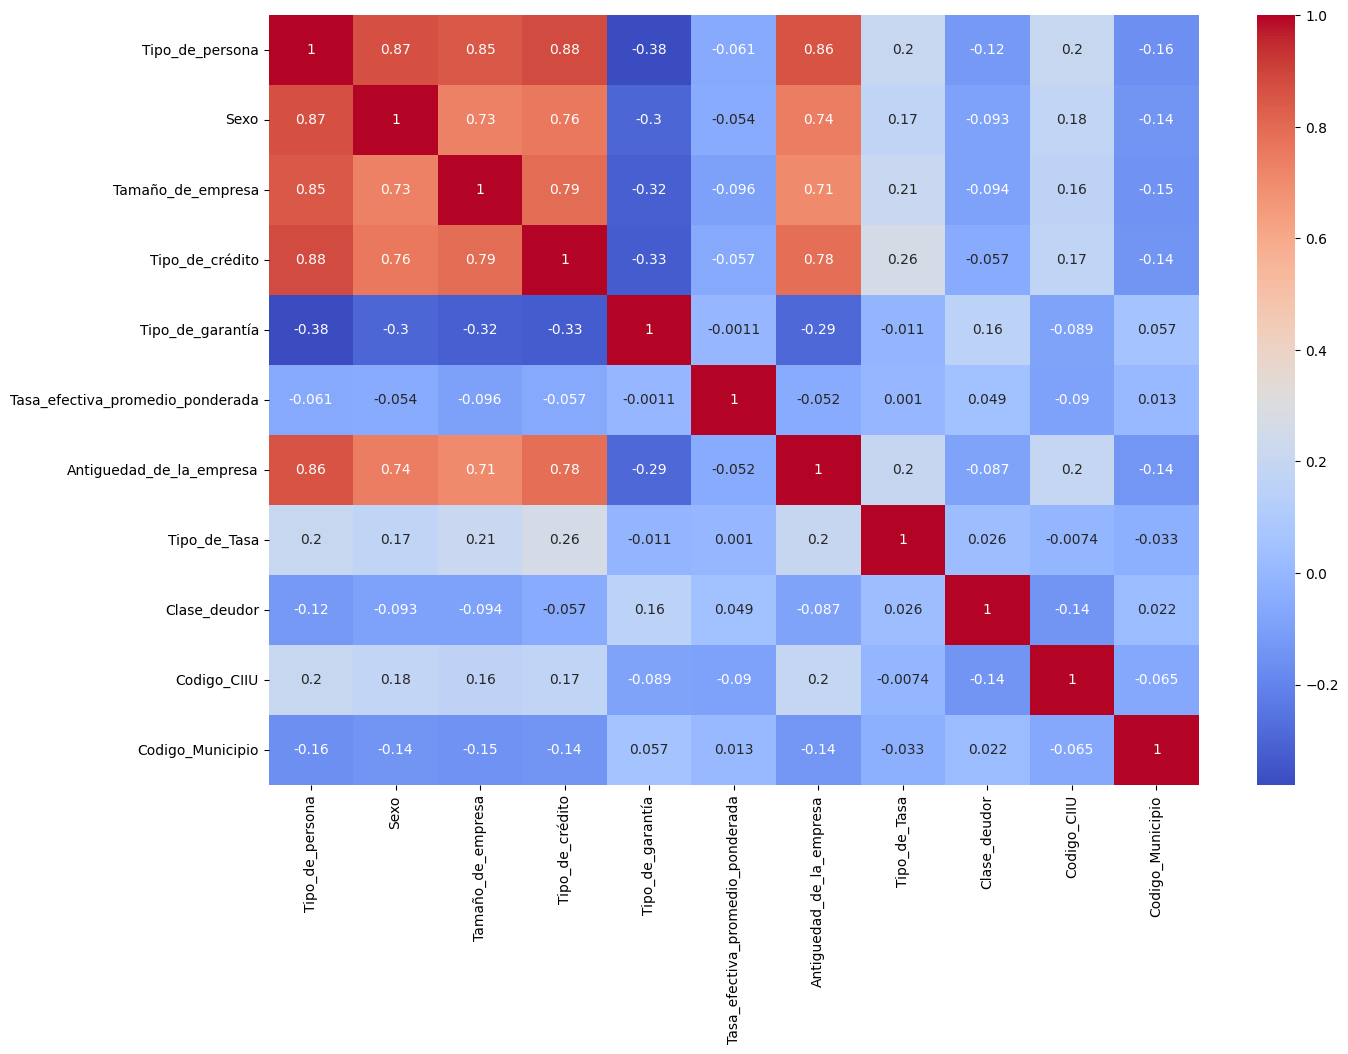

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
#correlacion entre las variables
df_numerico = df_Bancolombia_copia.select_dtypes(exclude=['object'])
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm')
plt.show()

## Escalamos los datos

In [18]:
from sklearn.preprocessing import StandardScaler
# Inicializa el escalador
scaler = StandardScaler()
# Aplica la estandarización a todas las columnas numéricas
df_numerico_escalado = pd.DataFrame(scaler.fit_transform(df_numerico), columns=df_numerico.columns)
df_numerico_escalado.head()


,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Tasa_efectiva_promedio_ponderada,Antiguedad_de_la_empresa,Tipo_de_Tasa,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,1.508273,1.305798,1.977638,1.276090,-0.919667,0.829146,3.227303,-0.189219,-0.216954,1.490365,-0.744948
1,-0.663010,0.097370,-0.575766,-0.625376,-0.919667,0.918003,-0.582728,-0.189219,-0.216954,1.515377,-0.956116
2,-0.663010,0.097370,-0.575766,-0.625376,1.053724,0.829146,-0.582728,-0.189219,-0.216954,0.550477,-0.528254
3,-0.663010,-1.111058,-0.575766,-0.625376,1.053724,-1.319732,-0.582728,-0.189219,-0.216954,-1.220592,-0.952071
4,1.508273,1.305798,1.977638,1.276090,-0.919667,0.831957,0.687282,-0.189219,-0.216954,1.319126,-0.744948


In [19]:
columnas_a_eliminar = ['Codigo_CIIU','Codigo_Municipio']

# Utiliza el método drop para eliminar las columnas
df_numerico_escalado =df_numerico_escalado.drop(columnas_a_eliminar, axis=1)
df_numerico_escalado.head()

,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Tasa_efectiva_promedio_ponderada,Antiguedad_de_la_empresa,Tipo_de_Tasa,Clase_deudor
0,1.508273,1.305798,1.977638,1.276090,-0.919667,0.829146,3.227303,-0.189219,-0.216954
1,-0.663010,0.097370,-0.575766,-0.625376,-0.919667,0.918003,-0.582728,-0.189219,-0.216954
2,-0.663010,0.097370,-0.575766,-0.625376,1.053724,0.829146,-0.582728,-0.189219,-0.216954
3,-0.663010,-1.111058,-0.575766,-0.625376,1.053724,-1.319732,-0.582728,-0.189219,-0.216954
4,1.508273,1.305798,1.977638,1.276090,-0.919667,0.831957,0.687282,-0.189219,-0.216954


In [20]:
df_bancolombia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0


## PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_numerico_escalado)
pca_data_scaled = pca.transform(df_numerico_escalado)
pca_data_scaled

array([[ 4.13553696e+00, -1.26799940e-01, -1.04117271e+00, ...,
         9.53874974e-01, -1.07339981e+00,  5.49176573e-01],
       [-8.82239238e-01, -5.47822812e-01, -1.17055527e+00, ...,
        -5.85527777e-01, -5.71215333e-02,  2.76278554e-01],
       [-1.28764677e+00,  2.89447325e-01, -5.33523230e-01, ...,
        -5.37220332e-01,  7.16969884e-04,  1.82551518e-01],
       ...,
       [ 3.79208449e+00,  1.90630879e+00, -6.26520277e-01, ...,
         7.10780939e-03, -4.62243140e-01,  1.38513596e-03],
       [-1.19961153e+00, -1.65642154e-01,  1.50998669e+00, ...,
        -5.65925599e-01,  3.44893935e-02,  1.67154903e-01],
       [ 3.15639142e+00, -7.06790570e-01,  1.01673819e+00, ...,
        -1.50268064e-01, -7.24514882e-02, -8.50577024e-02]])

In [22]:
var = pca.explained_variance_ratio_
print(var)

[0.49239099 0.12345156 0.11127068 0.10006039 0.08450393 0.0324887
 0.0287611  0.01996923 0.00710341]


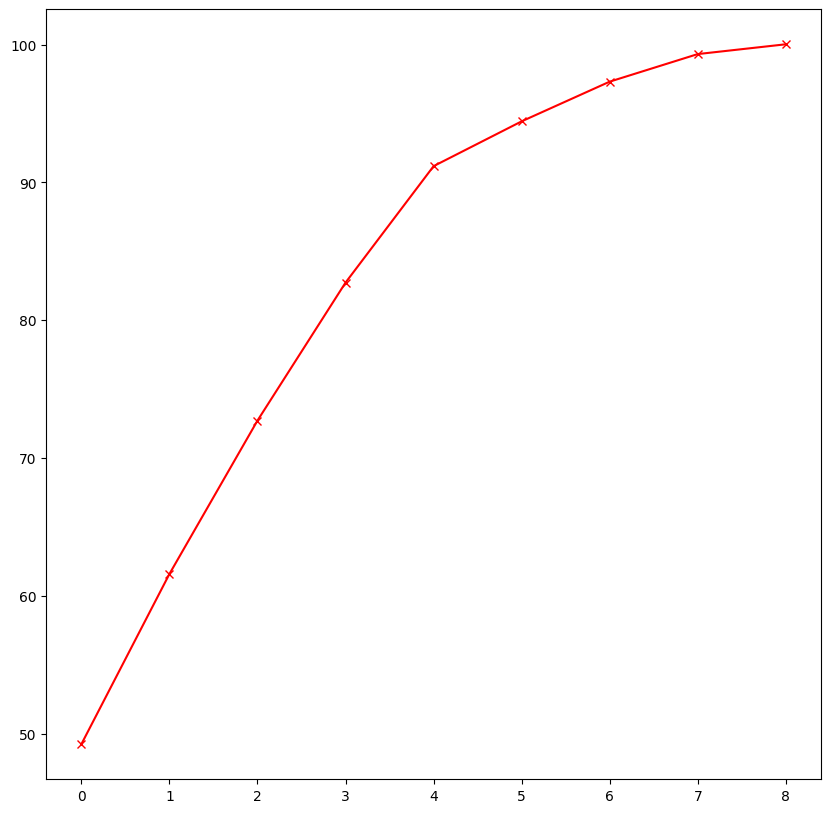

In [23]:
import numpy as np
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

viendo la grafica nos quedamos con las columnas del 0-3

In [24]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1, inplace=True)

In [25]:
pca_data_standard

,0,1,2,3
0,4.135537,-0.126800,-1.041173,-0.551826
1,-0.882239,-0.547823,-1.170555,0.156886
2,-1.287647,0.289447,-0.533523,0.212071
3,-1.707873,-0.194456,1.519604,0.131768
4,3.068241,-0.251106,-1.029446,-0.385038
...,...,...,...,...
80590,2.476213,0.629397,-0.557011,-0.314326
80591,3.331639,-0.663060,0.971752,-0.617312
80592,3.792084,1.906309,-0.626520,2.836918
80593,-1.199612,-0.165642,1.509987,0.017810


## Clustering

In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

## K-Means
# Con PCA

In [27]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(pca_data_standard,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

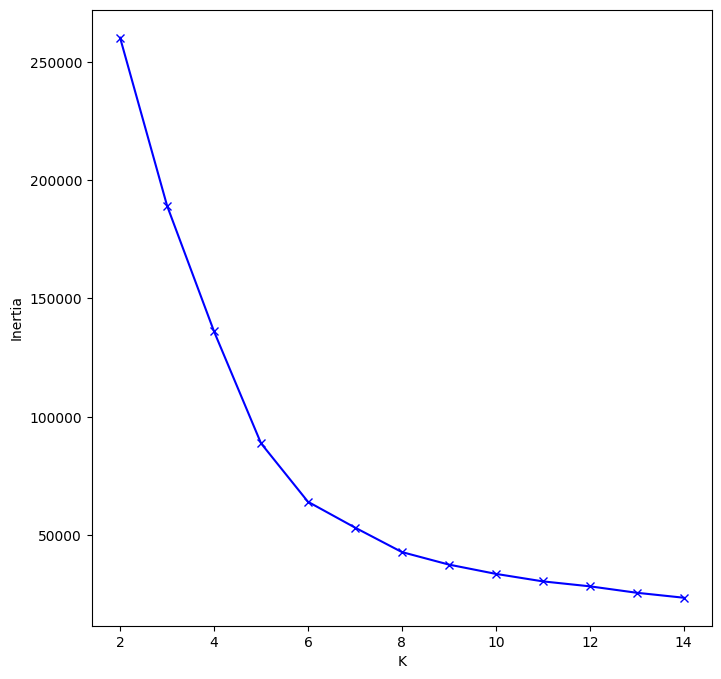

In [28]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

posiblemente sean de 3 clustering segun la grafica
verificamos graficanfo el coeficiente de silueta

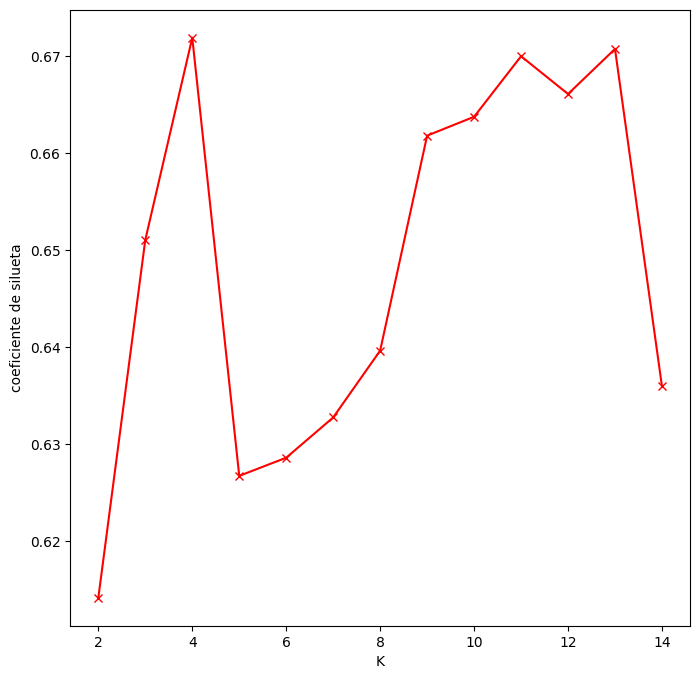

In [29]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('coeficiente de silueta')
plt.show()

serian 4 clustering segun la grafica
## Calculamos el coheficiente de Silueta y guardamos los resultados en df_bancombia

In [30]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard, y))
df_bancolombia['k_means_pca'] = y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6719141365487133


In [31]:
df_bancolombia.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,2
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,1
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,1
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,1
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,2


## K-Means
# Sin PCA

In [32]:
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
    km = KMeans(n_clusters = _)
    y = km.fit_predict(df_numerico_escalado)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(df_numerico_escalado,y))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

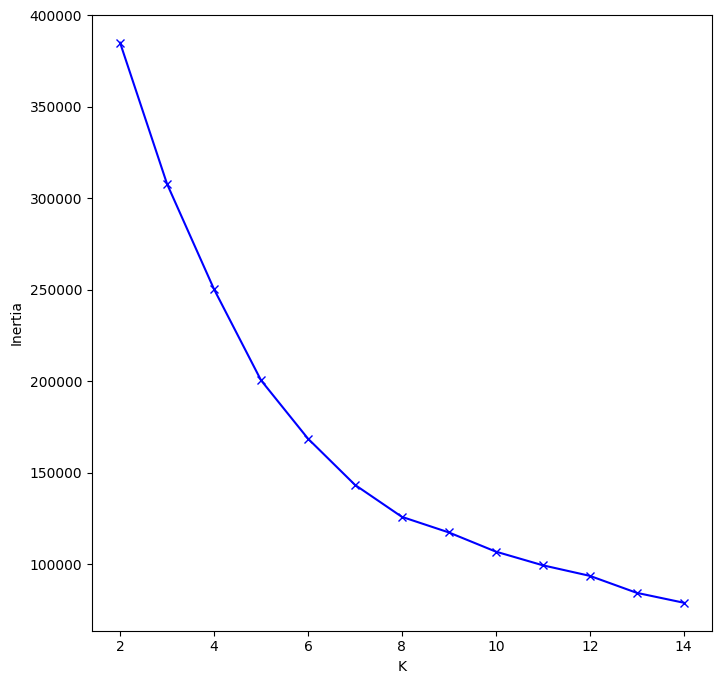

In [33]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

segun esta grafica pueden ser 4, graficamos ahora el coeficiente de silueta

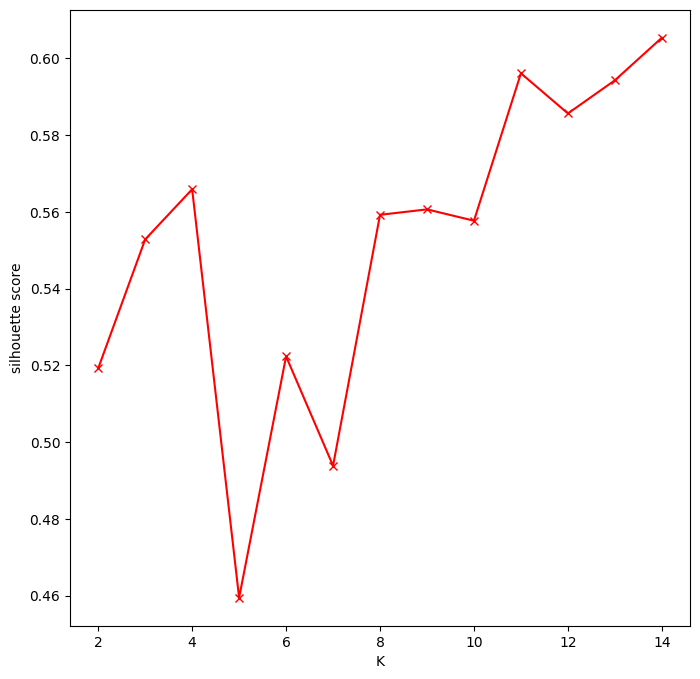

In [34]:
fig = plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.show()

en ambas graficas corresponde a 4 Clustering



In [35]:
km = KMeans(n_clusters = 4)
y = km.fit_predict(df_numerico_escalado)
print(silhouette_score(df_numerico_escalado, y))
df_bancolombia['k_means'] = y
df_bancolombia.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.43299924354447156


,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,2,1
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,1,2
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,1,0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,1,0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,2,1


In [36]:
from google.colab import files

# Supongamos que tienes un DataFrame llamado df

# Guarda el DataFrame como un archivo CSV
df_bancolombia.to_csv('Bancolombia_Clustering_5.csv', index=False)

# Descarga el archivo CSV
files.download('Bancolombia_Clustering_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
df_clustering=pd.read_csv('Bancolombia_Clustering_5.csv')
df_clustering.head()

,Fecha_Corte,Tipo_de_persona,Sexo,Tamaño_de_empresa,Tipo_de_crédito,Tipo_de_garantía,Producto de crédito,Plazo de crédito,Tasa_efectiva_promedio_ponderada,margen_adicional,Montos_desembolsados,Numero_de_creditos_desembolsados,Antiguedad_de_la_empresa,Tipo_de_Tasa,Rango_monto_desembolsado,Clase_deudor,Codigo_CIIU,Codigo_Municipio,k_means_pca,k_means
0,01/12/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Tarjeta de crédito empresarial,Consumos entre 25 y 36 meses,38.21,0.0,3538866.93,5.0,0 a 5 años,FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,8544,11001.0,2,1
1,20/10/2023,Natural,Femenino,No aplica,Consumo,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona natural,Hasta 30 días,39.79,0.0,480291.09,2.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,8622,5154.0,1,2
2,01/12/2023,Natural,Femenino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos entre 2 y 6 meses,38.21,0.0,353840.00,1.0,No aplica(1),FS,Hasta 1 SMLMV,Deudor de la entidad,5613,17001.0,1,0
3,29/09/2023,Natural,Masculino,No aplica,Consumo,Sin garantia,Tarjeta de crédito para ingresos superiores a ...,Consumos a un mes,0.00,0.0,14806418.00,29.0,No aplica(1),FS,Mayor a 1 SMLMV menor o igual a 3 SMLMV,Deudor de la entidad,90,5266.0,1,0
4,24/11/2023,Jurídica,No aplica,Mediana empresa,Comercial ordinario,Garantia idónea o no idónea,Sobregiro en cuenta corriente persona jurídica...,Hasta 30 días,38.26,0.0,76230556.86,10.0,más de 10 años,FS,Mayor a 12 SMLMV y menor o igual a 25 SMLMV,Deudor de la entidad,8010,11001.0,2,1


comparamos coeficiente de silueta (con PCA=0.4341) (sin PCA=0.44104)